# Machine Learning to distinguish presence Heart Disease

In [1]:
#data analysis and wrangling
import pandas as pd
import numpy as np

#visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#model developing-machine learning
import sklearn
from scipy.stats import zscore                                                          #for removing the outliers
from sklearn.preprocessing import StandardScaler                                        #for standardizing the input dataset
from sklearn.model_selection import train_test_split                                    #to train the model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score       #for reporting purposes

#boosting techniques
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

#saving the model using joblib
import pickle
#for filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [8]:
#acquiring the data
heartdisease_df=pd.read_csv("heartdisease_data.csv")

In [9]:
heartdisease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [10]:
#checking the structure of the dataset
heartdisease_df.shape

(200, 14)

In [11]:
#checking if any null values present in the dataset
heartdisease_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [12]:
heartdisease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [17]:
#converting sting data to int or float data using label encoder
from sklearn.preprocessing import LabelEncoder
le_x = LabelEncoder() 
for col in heartdisease_df.columns:
    heartdisease_df[col] = le_x.fit_transform(heartdisease_df[col])
heartdisease_df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
55,30,1,3,22,0,0,0,24,1,11,1,1,3,2
42,23,1,3,40,0,1,1,51,0,6,1,1,2,3
62,19,1,3,17,88,2,1,34,1,9,1,1,3,1
153,17,1,3,32,34,0,0,6,1,10,1,1,3,1
13,25,1,2,40,0,0,2,59,2,14,3,1,3,1


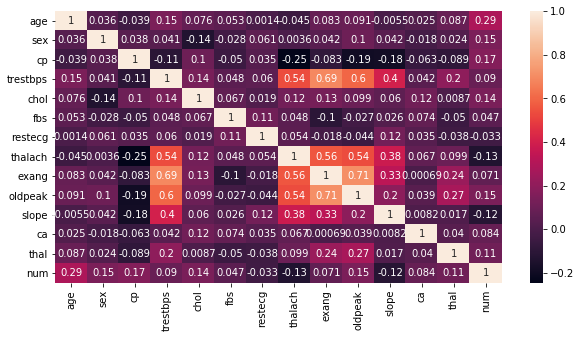

In [18]:
#checking for the correlation
corr_hmap=heartdisease_df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_hmap,annot=True)

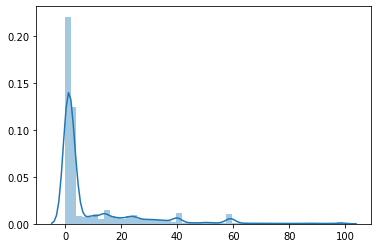

In [19]:
#vizualizing the distribution
sns.distplot(heartdisease_df,kde=True)

age            AxesSubplot(0.125,0.799681;0.168478x0.0803191)
sex         AxesSubplot(0.327174,0.799681;0.168478x0.0803191)
cp          AxesSubplot(0.529348,0.799681;0.168478x0.0803191)
trestbps    AxesSubplot(0.731522,0.799681;0.168478x0.0803191)
chol           AxesSubplot(0.125,0.703298;0.168478x0.0803191)
fbs         AxesSubplot(0.327174,0.703298;0.168478x0.0803191)
restecg     AxesSubplot(0.529348,0.703298;0.168478x0.0803191)
thalach     AxesSubplot(0.731522,0.703298;0.168478x0.0803191)
exang          AxesSubplot(0.125,0.606915;0.168478x0.0803191)
oldpeak     AxesSubplot(0.327174,0.606915;0.168478x0.0803191)
slope       AxesSubplot(0.529348,0.606915;0.168478x0.0803191)
ca          AxesSubplot(0.731522,0.606915;0.168478x0.0803191)
thal           AxesSubplot(0.125,0.510532;0.168478x0.0803191)
num         AxesSubplot(0.327174,0.510532;0.168478x0.0803191)
dtype: object

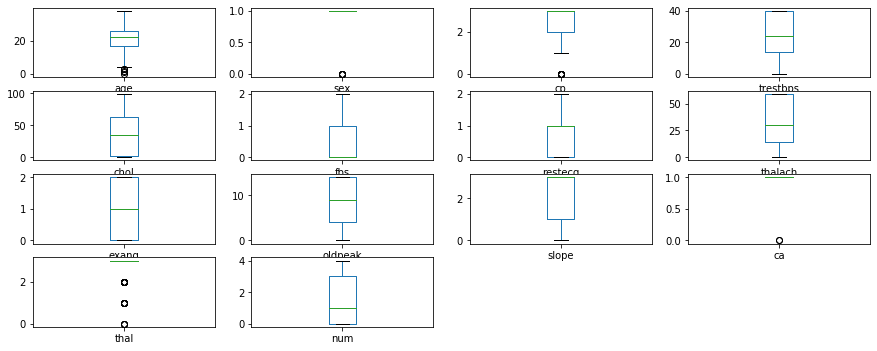

In [20]:
#checking for the outliers
heartdisease_df.plot(kind='box',subplots=True,layout=(8,4),figsize=(15,12))

In [21]:
#checking the skewness before removing the outliers
heartdisease_df.skew()

age       -0.404091
sex       -5.552105
cp        -1.648734
restecg    0.391463
num        0.297393
dtype: float64

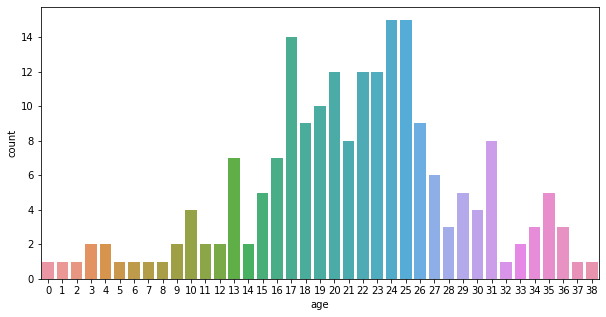

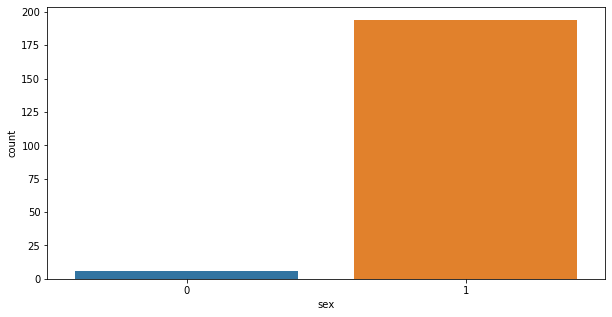

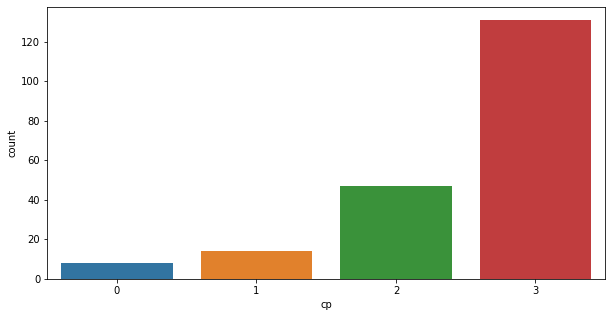

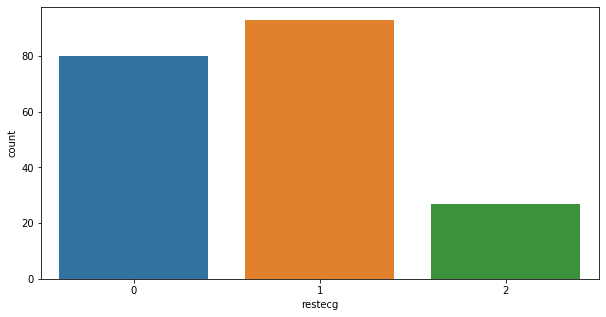

In [22]:
#printing different plot w.r.t survived column
columns=['age','sex','cp','restecg']
for i in range(len(columns)):
    fig,ax=plt.subplots(figsize=(10,5))
    sns.countplot(data=heartdisease_df,x=columns[i])

In [23]:
#removing outliers
z_score=np.abs(zscore(heartdisease_df))
print(heartdisease_df.shape)
heartdisease_df_final=heartdisease_df.loc[(z_score<3).all(axis=1)]
print(heartdisease_df_final.shape)

(200, 14)
(180, 14)


In [24]:
#checking the skewness after removing the outliers
heartdisease_df_final.skew()

age        -0.283468
sex         0.000000
cp         -1.353890
trestbps   -0.163104
chol        0.416594
fbs         1.005818
restecg     0.350479
thalach    -0.044131
exang      -0.024886
oldpeak    -0.161707
slope      -0.604877
ca          0.000000
thal       -2.574026
num         0.244243
dtype: float64

In [45]:
#Now separating input and output variable
x=avacado_df.drop(['chol','fbs','trestbps','thalach','exang','oldpeak','slope','ca','thal'],axis=1)
y=avacado_df['num']
print(x.shape)
print(y.shape)

(200, 5)
(200,)


In [46]:
x.dtypes

age        int64
sex        int64
cp         int64
restecg    int64
num        int64
dtype: object

In [47]:
#standardizing the input dataset 
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.46842053,  0.17586311,  0.62365375,  0.38870891,  0.3946109 ],
       [-1.96993293,  0.17586311,  0.62365375,  0.38870891, -1.24960118],
       [ 0.08341736,  0.17586311,  0.62365375,  0.38870891,  0.3946109 ],
       [-0.55825461,  0.17586311,  0.62365375,  0.38870891, -0.42749514],
       [ 0.85342371,  0.17586311, -0.63625282,  1.85553498, -1.24960118],
       [ 0.85342371,  0.17586311, -0.63625282,  0.38870891, -1.24960118],
       [ 0.72508932,  0.17586311,  0.62365375,  0.38870891,  1.21671694],
       [ 0.08341736,  0.17586311, -0.63625282,  0.38870891, -1.24960118],
       [ 0.08341736,  0.17586311, -0.63625282, -1.07811716,  1.21671694],
       [ 0.08341736,  0.17586311, -1.8961594 ,  0.38870891, -0.42749514],
       [-0.42992022,  0.17586311, -1.8961594 ,  0.38870891, -1.24960118],
       [-0.04491704,  0.17586311,  0.62365375,  0.38870891, -0.42749514],
       [ 0.34008614,  0.17586311,  0.62365375, -1.07811716, -0.42749514],
       [ 0.46842053,  0.17586311, -0.6

In [48]:
#Machine Learning Models
models=[]
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', tree.DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC()))

In [49]:
accuracy_results = []
names = []
for name, model in models:
    print(name)
    max_acc_score=0
    for r_state in range(42,80):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.10)
        model_name=model
        model_name.fit(x_train,y_train)
        y_pred=model_name.predict(x_test)
        accuracy_scr=accuracy_score(y_test,y_pred)
        print("random state: ",r_state," accuracy score: ",accuracy_scr)
        if accuracy_scr>max_acc_score:
            max_acc_score=accuracy_scr      
            final_r_state=r_state
    accuracy_results.append(max_acc_score*100)        
    print()
    print("max accuracy score at random state:",final_r_state," for the model ",name," is: ",max_acc_score)
    print()
    print()

LR
random state:  42  accuracy score:  1.0
random state:  43  accuracy score:  1.0
random state:  44  accuracy score:  1.0
random state:  45  accuracy score:  0.95
random state:  46  accuracy score:  1.0
random state:  47  accuracy score:  0.85
random state:  48  accuracy score:  1.0
random state:  49  accuracy score:  1.0
random state:  50  accuracy score:  0.95
random state:  51  accuracy score:  0.95
random state:  52  accuracy score:  1.0
random state:  53  accuracy score:  0.95
random state:  54  accuracy score:  0.95
random state:  55  accuracy score:  0.95
random state:  56  accuracy score:  0.95
random state:  57  accuracy score:  0.95
random state:  58  accuracy score:  0.95
random state:  59  accuracy score:  0.9
random state:  60  accuracy score:  1.0
random state:  61  accuracy score:  1.0
random state:  62  accuracy score:  0.9
random state:  63  accuracy score:  0.85
random state:  64  accuracy score:  1.0
random state:  65  accuracy score:  1.0
random state:  66  accurac

In [50]:
#cross_val of the models
results = []
names = []
cvs=[]
for name, model in models:
    cv_result=cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")
    results.append(cv_result)
    names.append(name)
    print("Model name: ",name)
    print("Cross Validation Score(Mean): ",cv_result.mean())
    cvs.append(cv_result.mean()*100)
    print("Cross Validation Score(Std): ",cv_result.std())
    print()

Model name:  LR
Cross Validation Score(Mean):  0.9444444444444444
Cross Validation Score(Std):  0.01756820922315767

Model name:  KNN
Cross Validation Score(Mean):  0.7444444444444445
Cross Validation Score(Std):  0.05931710140017398

Model name:  DT
Cross Validation Score(Mean):  1.0
Cross Validation Score(Std):  0.0

Model name:  GNB
Cross Validation Score(Mean):  1.0
Cross Validation Score(Std):  0.0

Model name:  SVC
Cross Validation Score(Mean):  0.95
Cross Validation Score(Std):  0.020786985482077462



In [51]:
#checking for the best results
result=pd.DataFrame({'Model':models,'Accuracy_Score':accuracy_results, 'Cross_Validation_Score':cvs})
result

,Model,Accuracy_Score,Cross_Validation_Score
0,"(LR, LogisticRegression(C=1.0, class_weight=No...",100.0,94.444444
1,"(KNN, KNeighborsClassifier(algorithm='auto', l...",95.0,74.444444
2,"(DT, DecisionTreeClassifier(ccp_alpha=0.0, cla...",100.0,100.000000
3,"(GNB, GaussianNB(priors=None, var_smoothing=1e...",100.0,100.000000
4,"(SVC, SVC(C=1.0, break_ties=False, cache_size=...",100.0,95.000000


In [53]:
#Choosing the Best Model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.10)
model_name=LogisticRegression()
model_name.fit(x_train,y_train)
model_name.score(x_train,y_train)
y_pred_model=model_name.predict(x_test)
accuracy_scr=accuracy_score(y_test,y_pred_model)
cfm=confusion_matrix(y_test,y_pred_model)
cr=classification_report(y_test,y_pred_model)
print("accuracy score: ",accuracy_scr)
print("confusion matrix: ")
print(cfm)
print("classification report: ")
print(cr)
print(y_pred_model)

accuracy score:  1.0
confusion matrix: 
[[3 0 0 0]
 [0 5 0 0]
 [0 0 6 0]
 [0 0 0 6]]
classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

[3 0 3 2 0 3 1 1 0 2 3 1 3 2 3 2 2 1 2 1]


In [54]:
#saving the model as pickle in a file
pickle.dump(model_name,open('SVC_heartdisease_df.pkl','wb'))

In [55]:
#loading the model for testing
loaded_model=pickle.load(open('SVC_heartdisease_df.pkl','rb'))
loaded_model.predict(x_test)

array([3, 0, 3, 2, 0, 3, 1, 1, 0, 2, 3, 1, 3, 2, 3, 2, 2, 1, 2, 1],
      dtype=int64)